In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['minimum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: minimum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['minimum_nights_avg_ntm'].max()
Min = Amsterdam['minimum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 7.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

6.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.421645160162184

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 7, 15)
intervalos

array([1.        , 1.42857143, 1.85714286, 2.28571429, 2.71428571,
       3.14285714, 3.57142857, 4.        , 4.42857143, 4.85714286,
       5.28571429, 5.71428571, 6.14285714, 6.57142857, 7.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['minimum_nights_avg_ntm'] = pd.cut ( x = Amsterdam ['minimum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Amsterdam['minimum_nights_avg_ntm']

0       Categoria3
1       Categoria3
2       Categoria4
3       Categoria5
4              NaN
           ...    
9654           NaN
9655    Categoria3
9656    Categoria5
9657    Categoria7
9658           NaN
Name: minimum_nights_avg_ntm, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['minimum_nights_avg_ntm'])
table1

,minimum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Categoria5,2978,0.308313,0.349613
1,Categoria3,2681,0.277565,0.664358
2,Categoria7,998,0.103323,0.781521
3,Categoria10,640,0.066259,0.856656
4,Categoria14,294,0.030438,0.891172
5,Categoria1,266,0.027539,0.922400
6,Categoria4,262,0.027125,0.953158
7,Categoria12,181,0.018739,0.974407
8,Categoria6,68,0.007040,0.982390
9,Categoria2,62,0.006419,0.989669


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,minimum_nights_avg_ntm,frequency
0,Categoria5,2978
1,Categoria3,2681
2,Categoria7,998
3,Categoria10,640
4,Categoria14,294
5,Categoria1,266
6,Categoria4,262
7,Categoria12,181
8,Categoria6,68
9,Categoria2,62


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('minimum_nights_avg_ntm')
Filtro_index

,frequency
minimum_nights_avg_ntm,
Categoria5,2978
Categoria3,2681
Categoria7,998
Categoria10,640
Categoria14,294
Categoria1,266
Categoria4,262
Categoria12,181
Categoria6,68


Text(0, 0.5, 'Frecuencia')

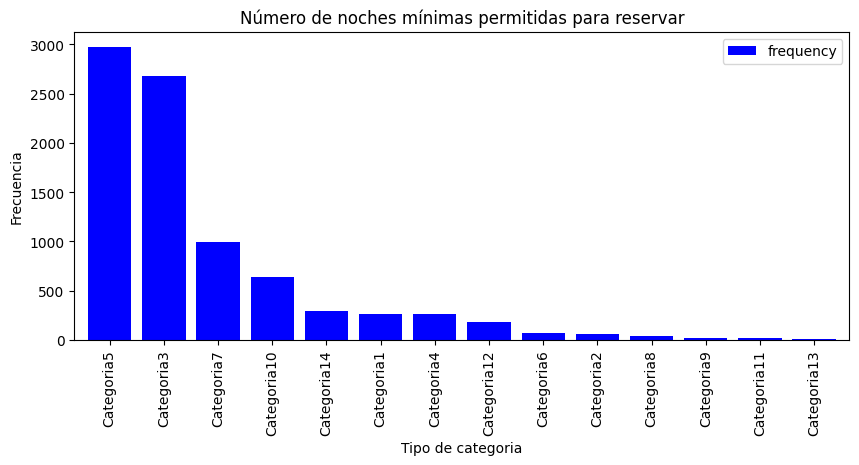

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches mínimas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')